# Introduction to Ml 
Ref: Hands-on ML with scikit-learn

In [13]:
# Librerias
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [15]:
#Funciones

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


**FIRST VISUALIZATION**

In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


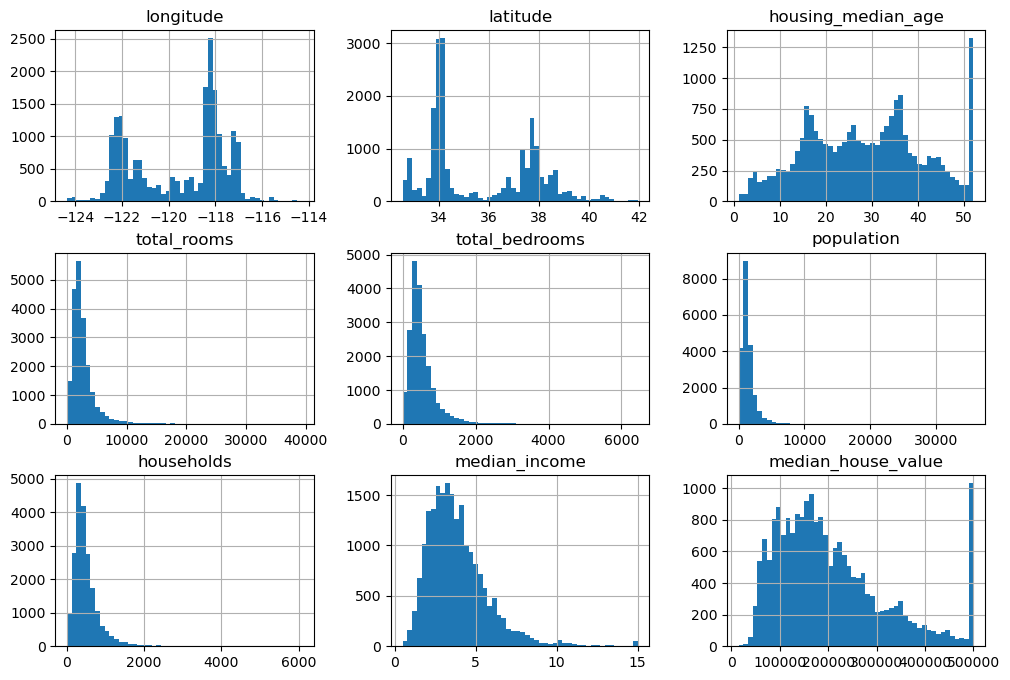

In [19]:
#Matplotlib to plot each attribute
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))
plt.show()

In [20]:
#Divide dataset to get the test set
import numpy as np

def shuffle_and_split_data(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size= int(len(data)* test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [22]:
train_set,test_set = shuffle_and_split_data(housing,0.2)


In [25]:
len(train_set)


16512

In [26]:
len(test_set)

4128

In [28]:
#Use the train test split from Scikit-learn
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2, random_state=42)

In [29]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])


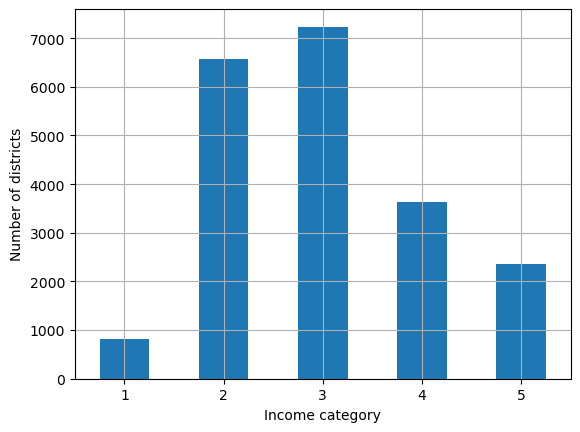

In [30]:

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n=housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [33]:
strat_train_set,strat_test_set = strat_splits[0]

In [34]:
strat_train_set,strat_test_set = train_test_split(housing,test_size=0.2,stratify=housing["income_cat"],random_state=42)

In [35]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64